In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from keras import losses
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\Acer\AppData\Local\Temp\ipykernel_18888\39059896.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def moving_average(data, window_size):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

In [3]:
training_data_path ='C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Gabungan_Training_Data_25 C_Panasonic.csv'
training_data = pd.read_csv(training_data_path)

X_train = training_data[['Voltage', 'Current', 'Temperature']]
y_train = training_data['SOC']

X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))

In [4]:
testing_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Testing_HWFET.csv'
testing_data = pd.read_csv(testing_data_path)

X_test = testing_data[['Voltage', 'Current', 'Temperature']]
y_test = testing_data['SOC']

X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [12]:
model = Sequential([
    LSTM(units=50, activation='tanh', return_sequences=True),
    BatchNormalization(),
    LSTM(units=50, activation='tanh', return_sequences=True),
    BatchNormalization(), 
    LSTM(units=50, activation='tanh', return_sequences=False),  
    BatchNormalization(),   
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [13]:
history = model.fit(X_train, y_train, epochs=200, 
                    batch_size=128, validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 0.0278 - val_loss: 0.0056
Epoch 2/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 3/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 4/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 5/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 6/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 8/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 11/200
2777/2777 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 1

In [14]:
model.summary()
model.save('C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Optimisasi Grid Search/skripsi_ion_25 C_HWFET_pake_grid_search.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,955 (605.30 KB)

 Trainable params: 51,551 (201.37 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 103,104 (402.75 KB)

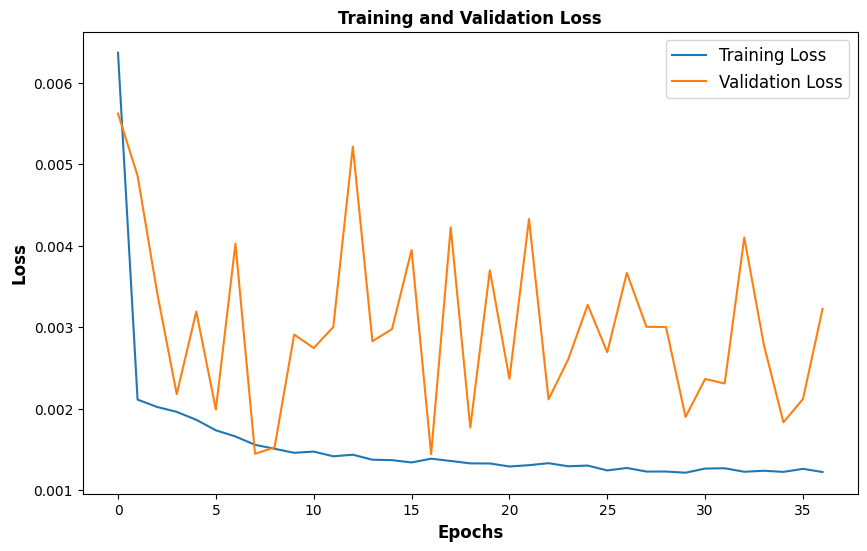

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12})
plt.show()

2374/2374 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0277
Testing Loss: 0.03437435254454613
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


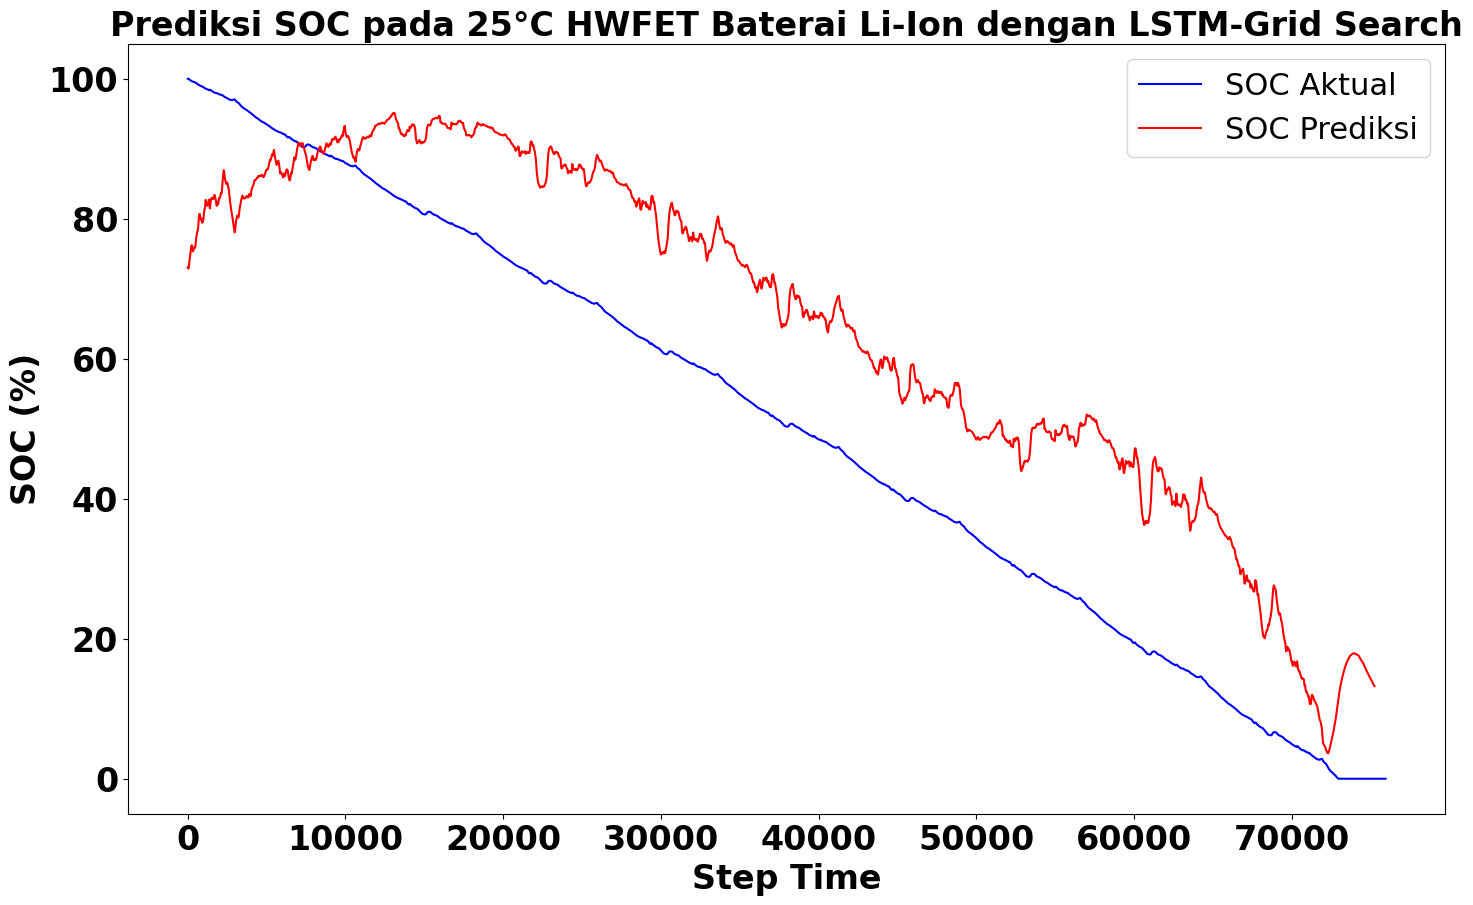

Evaluation Metrics (dalam persen):
Mean Absolute Error (MAE): 17.0846%
Root Mean Squared Error (RMSE): 18.2390%
R-squared: 62.1234%


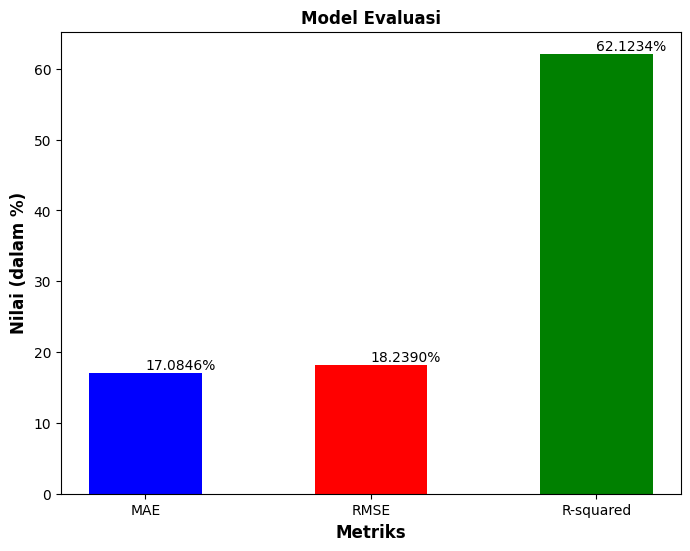

In [ ]:
loaded_model = load_model('C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Optimisasi Grid Search/skripsi_ion_25 C_HWFET_pake_grid_search.h5', custom_objects={'mse': losses.mean_squared_error})

loss = loaded_model.evaluate(X_test, y_test)
print(f'Testing Loss: {loss}')

y_pred = loaded_model.predict(X_test)

window_size = 700
y_pred_smoothed = moving_average(y_pred, window_size)

mae_smoothed = mean_absolute_error(y_test[window_size - 1:], y_pred_smoothed)
rmse_smoothed = mean_squared_error(y_test[window_size - 1:], y_pred_smoothed, squared=False)
r2_smoothed = r2_score(y_test[window_size - 1:], y_pred_smoothed)

y_test_scaled = y_test * 100
y_pred_smoothed_scaled = y_pred_smoothed * 100

plt.figure(figsize=(17, 10))
plt.plot(y_test_scaled, label='SOC Aktual', color='blue', linestyle='-')
plt.plot(y_pred_smoothed_scaled, label=f'SOC Prediksi', color='red', linestyle='-')
plt.title('Prediksi SOC pada 25°C HWFET Baterai Li-Ion dengan LSTM-Grid Search', fontsize=24, fontweight='bold')
plt.xlabel('Step Time', fontsize=24, fontweight='bold')
plt.ylabel('SOC (%)', fontsize=24, fontweight='bold')
plt.legend(prop={'size': 22})  
plt.xticks(fontsize=24, fontweight='bold')  
plt.yticks(fontsize=24, fontweight='bold')  
plt.show()

mae_percentage = mae_smoothed * 100
rmse_percentage = rmse_smoothed * 100
r2_percentage = r2_smoothed * 100
print("Evaluation Metrics (dalam persen):")
print(f"Mean Absolute Error (MAE): {mae_percentage:.4f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.4f}%")
print(f"R-squared: {r2_percentage:.4f}%")

plt.figure(figsize=(8, 6))  
bars = plt.bar(['MAE', 'RMSE', 'R-squared'], [mae_percentage, rmse_percentage, r2_percentage], color=['blue', 'red', 'green'], width=0.5)
plt.title('Model Evaluasi', fontweight='bold')
plt.xlabel('Metriks', fontsize=12, fontweight='bold')
plt.ylabel('Nilai (dalam %)', fontsize=12, fontweight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}%', va='bottom')

plt.show()